<a href="https://colab.research.google.com/github/mashaan14/python-tutorials/blob/main/Vectorization_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vectorization in Python
Vectorization refers to the style of coding where operations are applied to the whole array instead of individual elements. You can read more about vectorization on this link __[this link](https://en.wikipedia.org/wiki/Array_programming)__. This example shows a vectorized way on how to compute the distance from points to the centroids in $k$-means clustering.

For any questions about this notebook, please email me on __[mashaan.awad@outlook.com](mailto:mashaan.awad@outlook.com)__

## $k$-means clustering
$k$-means clustering attempts to minimize the distance between the points and the centroids. Let's create a set of 2D points and select the initial locations for the centroids.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

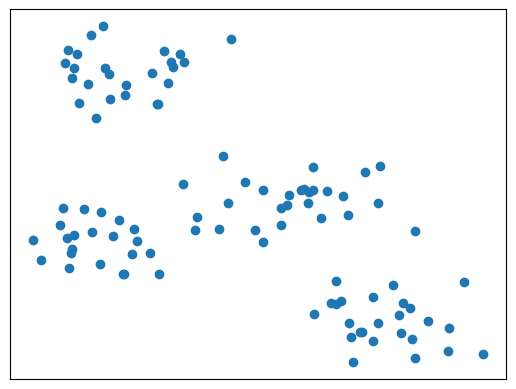

In [ ]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

I'll run $k$-means for one iteration just to get the centroids initialized using $k$-means++

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1, n_init=10)
kmeans.fit(X)
kmeans.cluster_centers_

array([[ 0.83044547,  4.27831711],
       [-1.27208964,  7.74944718],
       [ 1.97918933,  0.97920012],
       [-1.5772186 ,  3.11456071]])

Here are the $k$-means centroids compared to the rest of the dataset

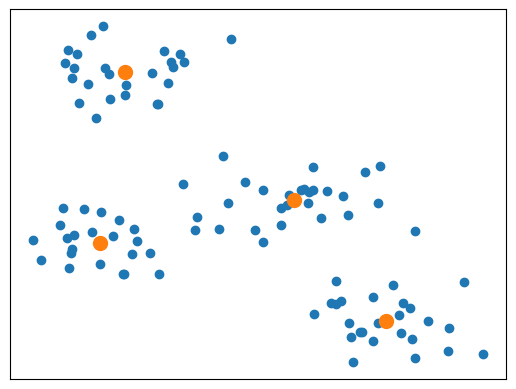

In [ ]:
C = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1]);
plt.scatter(C[:,0], C[:,1], s=100);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

So, we got a 100 2D points and 4 centroids


In [ ]:
X.shape

(100, 2)

In [ ]:
C.shape

(4, 2)

## Computing the distance in a non-vectorized way
Here's the formula for the Euclidean distance:

$d(x,c) = \sqrt{\sum_{i=1}^{n}{(x_i-c_i)}^2}$

Nested for loops can be used to compute the distance between $X$ and $C$

In [ ]:
D1 = np.zeros((X.shape[0], C.shape[0]))

In [ ]:
%%timeit
for i in range(X.shape[0]):
  for j in range(C.shape[0]):
    D1[i,j] = np.sqrt(np.sum(np.square(X[i,:] - C[j,:])))

3.81 ms ± 857 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


So it takes almost $3.8\ ms$ to complete the nested loops.

In [ ]:
D1[:5, :]

array([[0.70155255, 4.58551265, 2.92559024, 2.29787908],
       [4.68684888, 0.79117618, 8.0781447 , 4.90153191],
       [0.61044251, 4.32339337, 3.4412313 , 3.26404638],
       [0.34743575, 3.98023223, 3.66620433, 3.00152343],
       [1.15728608, 4.04237873, 4.05466745, 3.80600139]])

## Computing the distance in a vectorized way
Vectorizing the distance computation is done by stretching both arrays $X$ and $C$ to a new third dimension. The array $X$ is stretched along the $x$ and $z$ dimensions, and $C$ will stretch along $y$ and $z$. So when we accumulate along the $z$ dimension we will get the distance matrix $D$ along $x$ and $y$ dimensions.

In [ ]:
%%timeit
D2 = np.sqrt(np.square(X[:, None, :] - C[None, :, :]).sum(axis=-1))

73.1 µs ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Using vectorization it takes only $73\ \mu s$. This is a huge reduction, we're not using milliseconds anymore.

In [ ]:
D2 = np.sqrt(np.square(X[:, None, :] - C[None, :, :]).sum(axis=-1))
D2[:5, :]

array([[0.70155255, 4.58551265, 2.92559024, 2.29787908],
       [4.68684888, 0.79117618, 8.0781447 , 4.90153191],
       [0.61044251, 4.32339337, 3.4412313 , 3.26404638],
       [0.34743575, 3.98023223, 3.66620433, 3.00152343],
       [1.15728608, 4.04237873, 4.05466745, 3.80600139]])

Let's check if $D$ is accurate or not. The first point has the smallest distance to the first centroid. Plotting the first point in green and the first centroid in black. They look close.

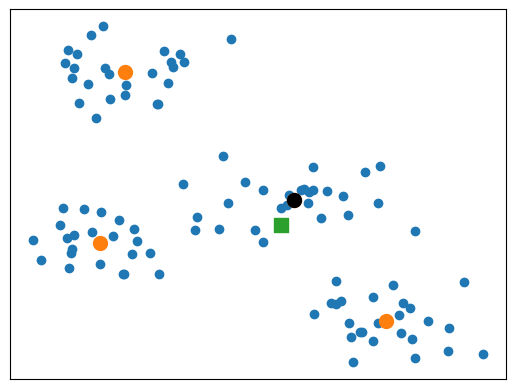

In [ ]:
plt.scatter(X[:,0], X[:,1]);
plt.scatter(C[:,0], C[:,1], s=100);
plt.scatter(X[0,0], X[0,1], s=100, marker='s');
plt.scatter(C[0,0], C[0,1], s=100, c='#000000');
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

Let's check the second point which looks closer to the second centroid.

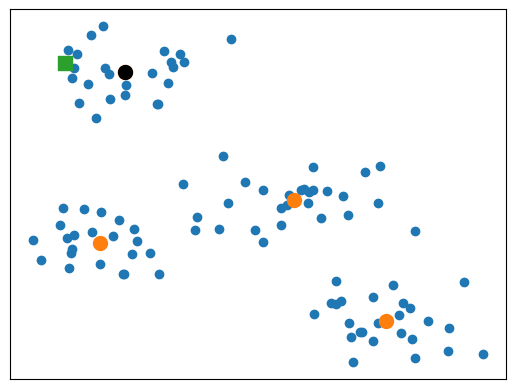

In [ ]:
plt.scatter(X[:,0], X[:,1]);
plt.scatter(C[:,0], C[:,1], s=100);
plt.scatter(X[1,0], X[1,1], s=100, marker='s');
plt.scatter(C[1,0], C[1,1], s=100, c='#000000');
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

Yes, they look close!!

In [ ]:
!jupyter nbconvert --to html /content/Vectorization_01.ipynb

[NbConvertApp] Converting notebook /content/Vectorization_01.ipynb to html
[NbConvertApp] Writing 660485 bytes to /content/Vectorization_01.html
